In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import os
import matplotlib.pyplot as plt

from datasets import BiosensorDataset

In [2]:
data_bool = BiosensorDataset(path = 'data/', mask_type=bool, biosensor_length=128, mask_size=80)
data_loader_bool = DataLoader(data_bool, batch_size=1, shuffle=False)

torch.Size([1, 128, 80, 80])
torch.Size([1, 80, 80])
tensor([0, 1], dtype=torch.uint8)
2


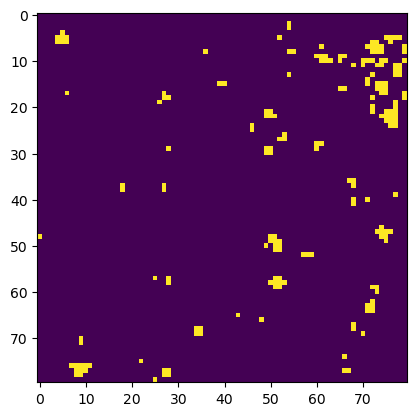

In [3]:
for bio, mask in data_loader_bool:
    print(bio.shape)
    print(mask.shape)
    plt.imshow(mask[0])
    print(mask[0].unique())
    print(len(mask[0].unique()))
    break

In [16]:
data80 = BiosensorDataset(path = 'data/', mask_type=np.int8, biosensor_length=128, mask_size=80)
data_loader80 = DataLoader(data80, batch_size=1, shuffle=False)

data4000 = BiosensorDataset(path = 'data/', mask_type=np.int8, biosensor_length=128, mask_size=4000)
data_loader4000 = DataLoader(data4000, batch_size=1, shuffle=False)

torch.Size([1, 128, 80, 80])
torch.Size([1, 4000, 4000])
tensor([  0,   4,   7,   8,  11,  13,  14,  15,  16,  17,  19,  21,  22,  23,
         26,  27,  28,  29,  30,  31,  32,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  62,  63,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  80,  81,  82,  83,  84,  85,  89,  90,  91,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 114, 117, 118,
        119, 120], dtype=torch.uint8)
86


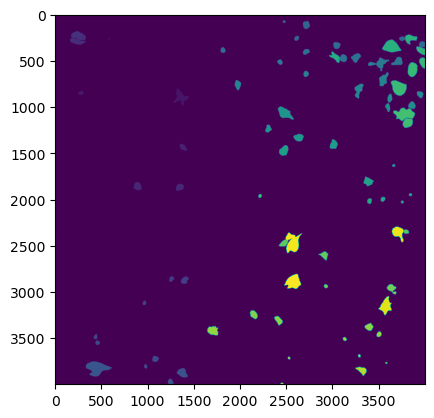

In [17]:
for bio, mask in data_loader4000:
    print(bio.shape)
    print(mask.shape)
    plt.imshow(mask[0])
    print(mask[0].unique())
    print(len(mask[0].unique()))
    break

torch.Size([1, 128, 80, 80])
torch.Size([1, 80, 80])
tensor([  0,   7,   8,  11,  13,  14,  15,  16,  17,  19,  21,  22,  26,  27,
         28,  30,  31,  32,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  52,  53,  54,  55,  56,  57,  58,  59,  60,  62,  63,  65,  67,
         68,  70,  71,  72,  73,  75,  76,  77,  78,  80,  81,  82,  83,  84,
         89,  90,  91,  94,  97,  98,  99, 100, 101, 103, 106, 114, 117, 118,
        119, 120], dtype=torch.uint8)
72


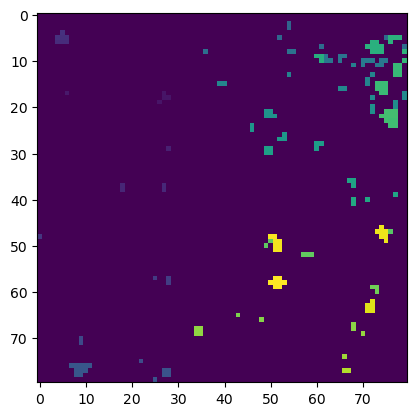

In [18]:
for bio, mask in data_loader80:
    print(bio.shape)
    print(mask.shape)
    plt.imshow(mask[0])
    print(mask[0].unique())
    print(len(mask[0].unique()))
    break

In [19]:
# Érdekes lehet megnézni hogy a leinterpolált maszkokon hány sejt van
# Ha intként marad akkor a különböző számokat megnézni az eredeti és a leinterpolált maszkokon (unique)
# Lehet hogy a leinterpolált maszkokon sokkal kevesebb sejt lesz mert összeolvadnak
unique4000 = []
max4000 = []
unique80 = []
for bio, mask in data_loader4000:
    unique4000.append(len(mask[0].unique()))
    max4000.append(mask[0].max().item())
for bio, mask in data_loader80:
    unique80.append(len(mask[0].unique()))

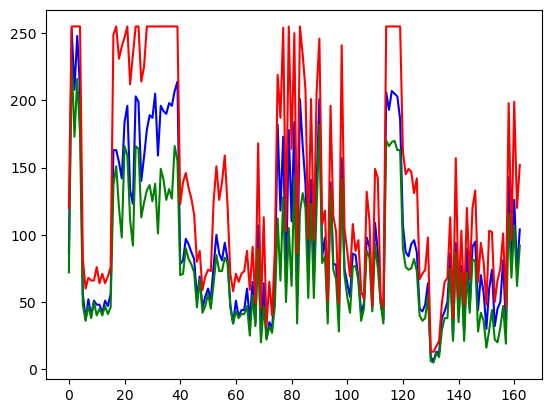

In [20]:
plt.plot(unique4000, label='4000', color='blue')
plt.plot(unique80, label='80', color='green')
plt.plot(max4000, label='max', color='red')

In [21]:
avg80 = sum(unique80) / len(unique80)
avg4000 = sum(unique4000) / len(unique4000)
max4000 = sum(max4000) / len(max4000)
print(avg80, avg4000, max4000)

78.53374233128834 96.99386503067484 135.11656441717793
